In [10]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [11]:
df = pd.read_csv('df1.csv')

In [42]:
print(df['target_class'].value_counts())


target_class
0    14916
2    10662
4     4791
1     2008
3      737
Name: count, dtype: int64


In [50]:
X= df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
y = df['target_class']

In [51]:
X=pd.get_dummies(X)

In [52]:
imputer = SimpleImputer(strategy="mean")
X1=imputer.fit_transform(X)
X1=pd.DataFrame(X1,columns=X.columns)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [54]:
svm_classifier = SVC(kernel='linear', random_state=0)

In [55]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [57]:
y_pred= svm_classifier.predict(X_test)

In [58]:
cm= confusion_matrix(y_test, y_pred)

In [62]:
from sklearn.metrics import accuracy_score
accuarcy=accuracy_score(y_test,y_pred)
print(" the accuarcy is ",accuarcy)

 the accuarcy is  1.0


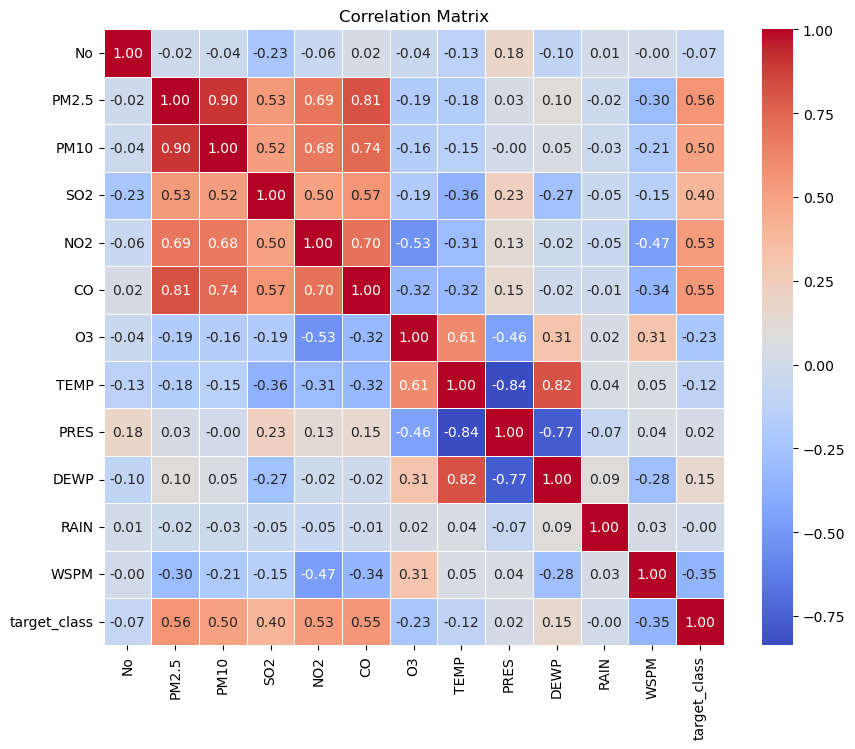

In [64]:
import seaborn as sns
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


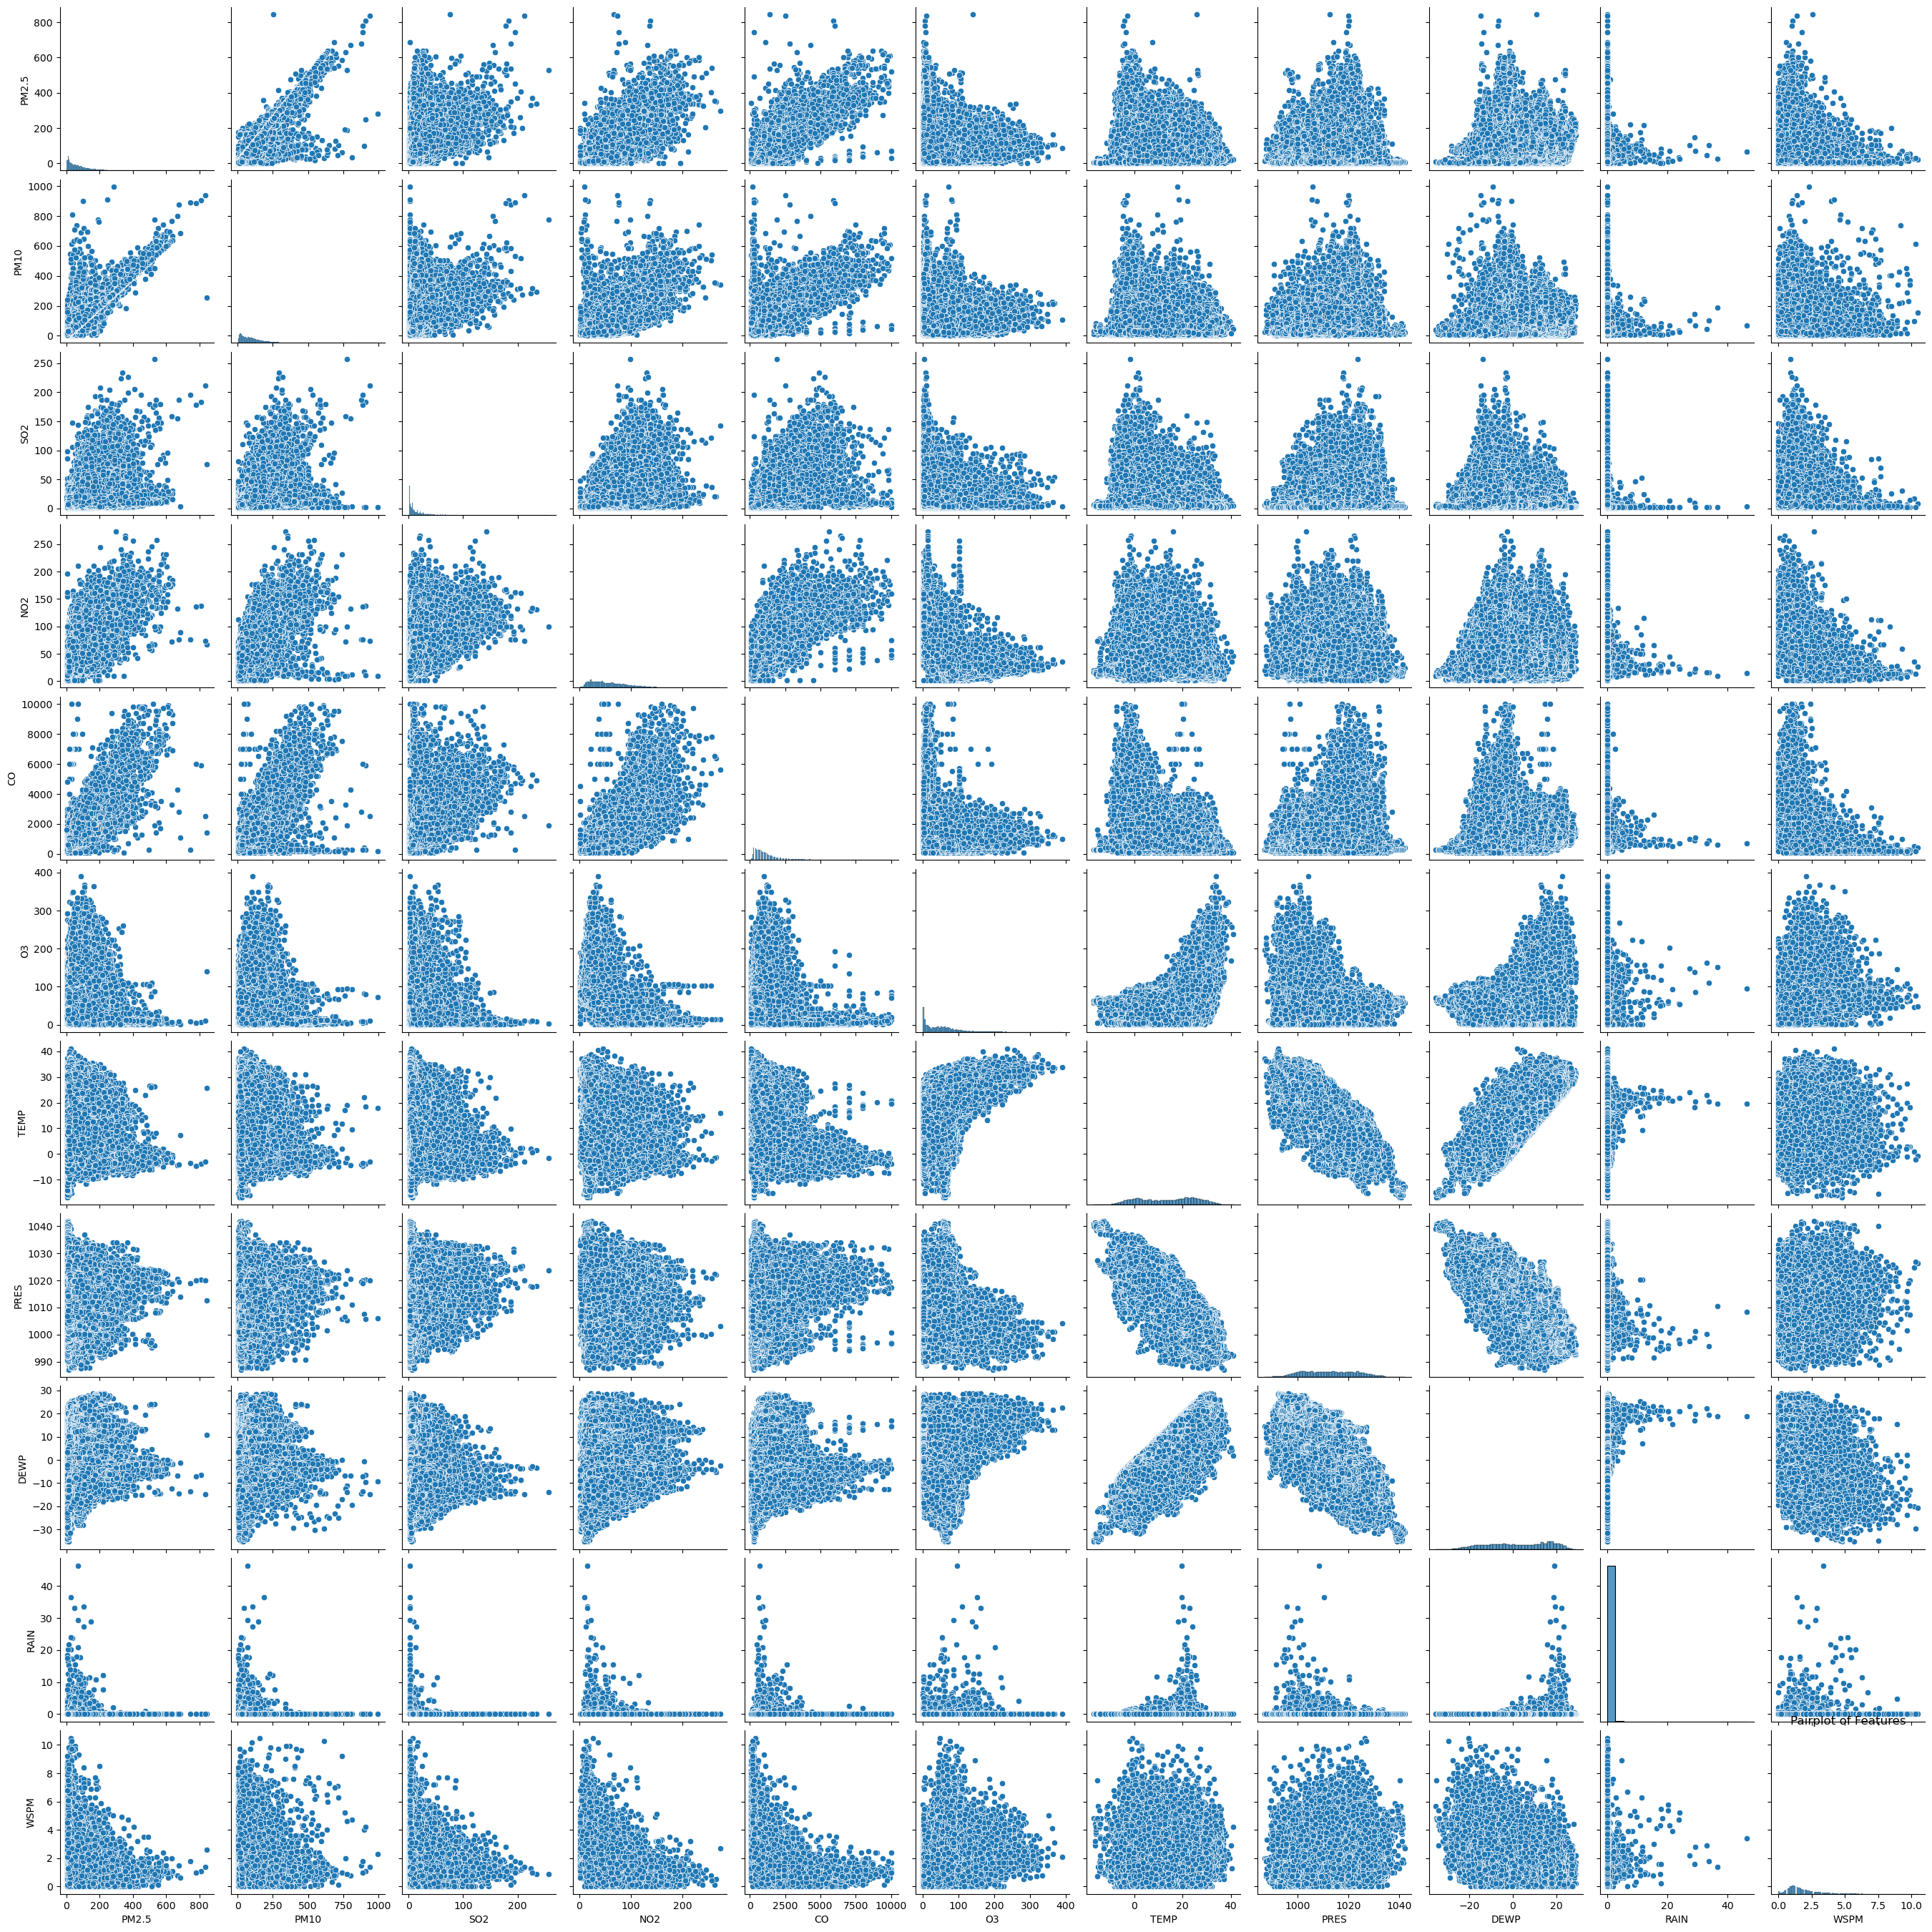

In [65]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
sns.pairplot(df[features])
plt.title('Pairplot of Features')
plt.show()

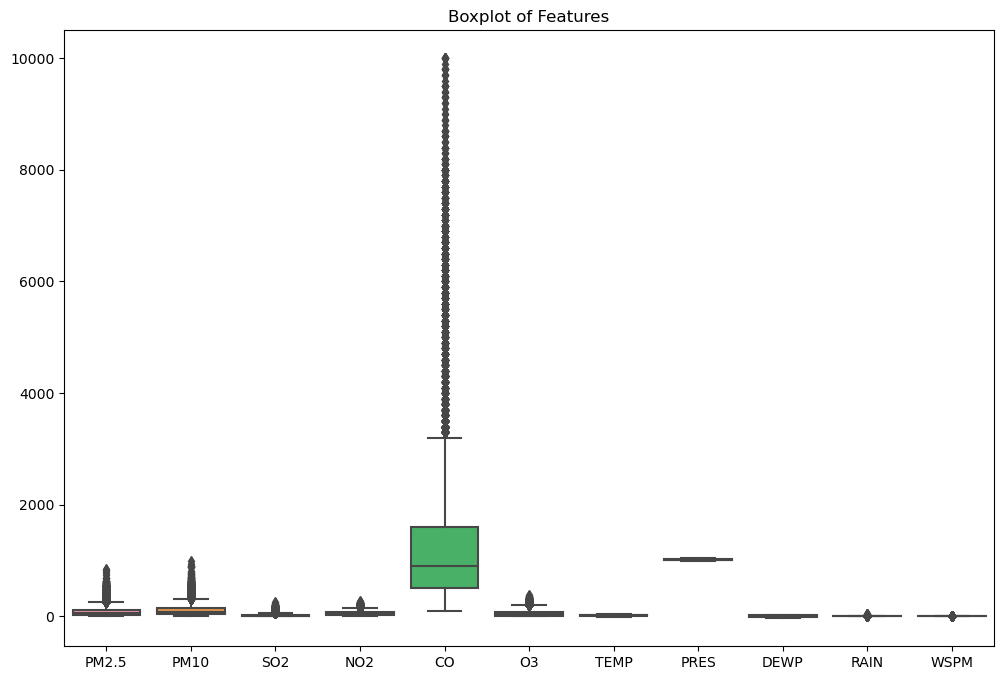

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[features])
plt.title('Boxplot of Features')
plt.show()